In [1]:
#importaciones de las librerias
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from typing import Dict, Tuple
from sklearn.base import BaseEstimator
from sklearn.impute import SimpleImputer
from numpy import nan

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.tree import _tree

In [2]:
data=pd.read_csv("titanic.csv")#Leemos el fichero csv
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Preprocesamiento de los datos

In [3]:
data.corr()# sin sns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [4]:
#Pasamos la variable categorica 'sex' a variable numerica
sex_map={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


Como podemos ver el id del pasajero y el nombre no tendra ninguna utilidad para calcular si sobrevivira o no al igual que la cabina en la que se encuentra, ademas de la tarifa que paga dado que esta informacion ya esta implicita dentreo de Pclass porque pagara mas quien este en una clase social mas alta, y el ticket

In [6]:
#Eliminamos dichas columnas
data=data.drop(columns=['Name', 'PassengerId','Cabin','Fare','Ticket'])

In [7]:
#Miramos los missing values
for i in data.columns:
    print (i + ": "+str(sum(data[i].isnull()))+" missing values")

Survived: 0 missing values
Pclass: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Embarked: 2 missing values


In [8]:
#Missing values Embarked
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#Como podemos ver al ser solo dos missing values sustituiremos estos valores por S dado que es la variable con mas valores.
data["Embarked"]=data["Embarked"].fillna("S")

In [10]:
#Creamos columnas para las dos variables de Embarked para que se puedan clasificar mejor
data["Embarked S"]=np.where(data["Embarked"]=="S",1,0)
data["Embarked C"]=np.where(data["Embarked"]=="C",1,0)
data["Embarked Q"]=np.where(data["Embarked"]=="Q",1,0)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked S,Embarked C,Embarked Q
0,0,3,1,22.0,1,0,S,1,0,0
1,1,1,0,38.0,1,0,C,0,1,0
2,1,3,0,26.0,0,0,S,1,0,0
3,1,1,0,35.0,1,0,S,1,0,0
4,0,3,1,35.0,0,0,S,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,S,1,0,0
887,1,1,0,19.0,0,0,S,1,0,0
888,0,3,0,NaN,1,2,S,1,0,0
889,1,1,1,26.0,0,0,C,0,1,0


In [11]:
#Tras crear una columna por cada valor de Embarked la eliminamos
data=data.drop(columns=['Embarked'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
0,0,3,1,22.0,1,0,1,0,0
1,1,1,0,38.0,1,0,0,1,0
2,1,3,0,26.0,0,0,1,0,0
3,1,1,0,35.0,1,0,1,0,0
4,0,3,1,35.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,1,0,0
887,1,1,0,19.0,0,0,1,0,0
888,0,3,0,NaN,1,2,1,0,0
889,1,1,1,26.0,0,0,0,1,0


In [12]:
datasetprueba=data[(data['SibSp']==3)]
datasetprueba

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
7,0,3,1,2.0,3,1,1,0,0
24,0,3,0,8.0,3,1,1,0,0
27,0,1,1,19.0,3,2,1,0,0
63,0,3,1,4.0,3,2,1,0,0
85,1,3,0,33.0,3,0,1,0,0
88,1,1,0,23.0,3,2,1,0,0
176,0,3,1,NaN,3,1,1,0,0
229,0,3,0,NaN,3,1,1,0,0
341,1,1,0,24.0,3,2,1,0,0
374,0,3,0,3.0,3,1,1,0,0


In [13]:
#Miramos los missing values
for i in data.columns:
    print (i + ": "+str(sum(data[i].isnull()))+" missing values")

Survived: 0 missing values
Pclass: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Embarked S: 0 missing values
Embarked C: 0 missing values
Embarked Q: 0 missing values


In [14]:
#Sustituimos los missing values con la mediana
imputer = SimpleImputer(strategy="median")
imputer.fit(data)
X = imputer.transform(data)
data = pd.DataFrame(X, columns=data.columns,index=data.index)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
0,0.0,3.0,1.0,22.0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,38.0,1.0,0.0,0.0,1.0,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.0,35.0,1.0,0.0,1.0,0.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,1.0,27.0,0.0,0.0,1.0,0.0,0.0
887,1.0,1.0,0.0,19.0,0.0,0.0,1.0,0.0,0.0
888,0.0,3.0,0.0,28.0,1.0,2.0,1.0,0.0,0.0
889,1.0,1.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0


In [15]:
#Quitamos 5 pasajeros para utilizarlos en el ultimo apartado
test=data.tail(5)
data.drop(data.tail(5).index,inplace=True)

Utilizamos como criterio de division el sexo y el embarked S dado que se trata de la variable de embarked mas frecuente 

In [16]:
dataset1=data[(data['Sex']==0) & (data['Embarked S']==0)]
dataset1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
1,1.0,1.0,0.0,38.0,1.0,0.0,0.0,1.0,0.0
9,1.0,2.0,0.0,14.0,1.0,0.0,0.0,1.0,0.0
19,1.0,3.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0
22,1.0,3.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0
28,1.0,3.0,0.0,28.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
866,1.0,2.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0
874,1.0,2.0,0.0,28.0,1.0,0.0,0.0,1.0,0.0
875,1.0,3.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0
879,1.0,1.0,0.0,56.0,0.0,1.0,0.0,1.0,0.0


In [17]:
dataset2=data[(data['Sex']==1) & (data['Embarked S']==1)]
dataset2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
0,0.0,3.0,1.0,22.0,1.0,0.0,1.0,0.0,0.0
4,0.0,3.0,1.0,35.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,1.0,54.0,0.0,0.0,1.0,0.0,0.0
7,0.0,3.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0
12,0.0,3.0,1.0,20.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
877,0.0,3.0,1.0,19.0,0.0,0.0,1.0,0.0,0.0
878,0.0,3.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0
881,0.0,3.0,1.0,33.0,0.0,0.0,1.0,0.0,0.0
883,0.0,2.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0


DATASET 1

In [18]:
#Creamos los datos con de entrenamiento y el test
x=dataset1.drop(["Survived"],axis=1)
y=dataset1["Survived"]
#80% para el training 20%para el test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
1,1.0,0.0,38.0,1.0,0.0,0.0,1.0,0.0
9,2.0,0.0,14.0,1.0,0.0,0.0,1.0,0.0
19,3.0,0.0,28.0,0.0,0.0,0.0,1.0,0.0
22,3.0,0.0,15.0,0.0,0.0,0.0,0.0,1.0
28,3.0,0.0,28.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
866,2.0,0.0,27.0,1.0,0.0,0.0,1.0,0.0
874,2.0,0.0,28.0,1.0,0.0,0.0,1.0,0.0
875,3.0,0.0,15.0,0.0,0.0,0.0,1.0,0.0
879,1.0,0.0,56.0,0.0,1.0,0.0,1.0,0.0


In [19]:
#Calculamos la precision del modelo
#Utilizamos kfold
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
def accuracy(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

In [20]:
Dec_tree=DecisionTreeClassifier(max_depth=4,random_state=5)
Dec_tree.fit(x_train,y_train)
print("Precision: " + str(accuracy(Dec_tree)))
#Error: 1- precision
print("Precision: " + str(1-accuracy(Dec_tree)))

Precision: 0.7601307189542483
Precision: 0.23986928104575167


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

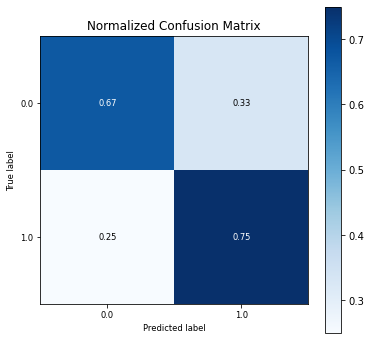

In [21]:
skplt.metrics.plot_confusion_matrix(y_test, Dec_tree.predict(x_test),normalize=True,figsize=(6,6),text_fontsize='small')

In [22]:
yr = Dec_tree.predict(x_test)
confusion_matrix(yr, y_test)

array([[ 4,  4],
       [ 2, 12]])

Podemos ver que este clasificador predice correctamente las muertes en un 67% de los casos, ha predecido correctamente la muerte de 4 pasajeros pero ha predecido incorrectamente la muerte de 2.
Tambien ha predecido correctamente la supervivencia en un 75% de los casos dado que a predecido correctamente que sobreviviran 12 pasajeros e incorrectamente 4.

DATASET 2

In [23]:
#Creamos los datos con de entrenamiento y el test
x=dataset2.drop(["Survived"],axis=1)
y=dataset2["Survived"]
#80% para el training 20%para el test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x

,Pclass,Sex,Age,SibSp,Parch,Embarked S,Embarked C,Embarked Q
0,3.0,1.0,22.0,1.0,0.0,1.0,0.0,0.0
4,3.0,1.0,35.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1.0,54.0,0.0,0.0,1.0,0.0,0.0
7,3.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0
12,3.0,1.0,20.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
877,3.0,1.0,19.0,0.0,0.0,1.0,0.0,0.0
878,3.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0
881,3.0,1.0,33.0,0.0,0.0,1.0,0.0,0.0
883,2.0,1.0,28.0,0.0,0.0,1.0,0.0,0.0


In [24]:
Dec_tree=DecisionTreeClassifier(max_depth=4,random_state=5)
Dec_tree.fit(x_train,y_train)

print("Precision: " + str(accuracy(Dec_tree)))
#Error: 1- precision
print("Error: " + str(1-accuracy(Dec_tree)))

Precision: 0.8579074446680082
Error: 0.14209255533199183


Podemos ver que la precision del segundo clasificador es mayor por lo que podemos afirmar que este clasificador tendra menos error.

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

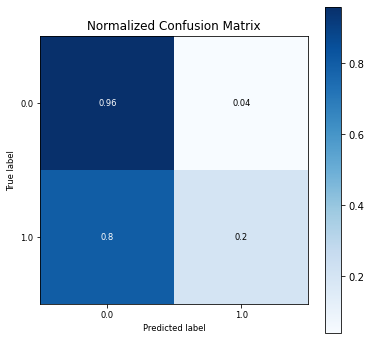

In [25]:
skplt.metrics.plot_confusion_matrix(y_test,Dec_tree.predict(x_test),normalize=True,figsize=(6,6),text_fontsize='small')

In [26]:
yr = Dec_tree.predict(x_test).round()
confusion_matrix(yr, y_test)

array([[65, 16],
       [ 3,  4]])

Podemos ver que predice el 96% de las muertes, predice correctamente 65 muertes e incorrectamente 3.
En cambio, predice correctamente el 20% de los supervivientes, ha predeci4 supervivientes pero incorrectamente 16.
Por lo que podemos afirmar que este modelo predice mucho mejor las muertes que la cantidad de supervivientes.

## Dibuja el modelo elegido en el punto anterior.

In [27]:
def pl_roc_curve(name,model,has_proba=True):
    fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    auc= skplt.metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label='Curva ROC para el clasificador %s con un AUC = %0.2f)' % (name, auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel(" Ratio de falsos positivos")
    plt.ylabel("Ratio de positivos verdaderos")
    plt.title("Curva ROC")
    plt.show()

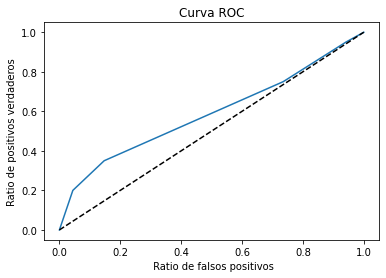

In [28]:
pl_roc_curve("Arbol decision",Dec_tree,has_proba=True) #dibuja modelo

## Selecciona tres reglas que sean las que generalicen lo menos posible y otras tres que especialicen lo menos posible. Interprétalas.

In [29]:
#Para obtener las reglas utilizamos los headers del entrenamiento
#La probabilidad de que ocurra se calcula dividiendo el numero mayor de casos entre el numero de casos totales
caract=list(x.columns)
text_representation = tree.export_text(Dec_tree, feature_names=caract,show_weights=True)
print(text_representation)

|--- Age <= 9.50
|   |--- SibSp <= 2.00
|   |   |--- weights: [0.00, 12.00] class: 1.0
|   |--- SibSp >  2.00
|   |   |--- Parch <= 1.50
|   |   |   |--- weights: [4.00, 0.00] class: 0.0
|   |   |--- Parch >  1.50
|   |   |   |--- Age <= 3.50
|   |   |   |   |--- weights: [1.00, 1.00] class: 0.0
|   |   |   |--- Age >  3.50
|   |   |   |   |--- weights: [3.00, 0.00] class: 0.0
|--- Age >  9.50
|   |--- Pclass <= 1.50
|   |   |--- Age <= 53.00
|   |   |   |--- Age <= 47.50
|   |   |   |   |--- weights: [29.00, 17.00] class: 0.0
|   |   |   |--- Age >  47.50
|   |   |   |   |--- weights: [2.00, 5.00] class: 1.0
|   |   |--- Age >  53.00
|   |   |   |--- weights: [10.00, 0.00] class: 0.0
|   |--- Pclass >  1.50
|   |   |--- Age <= 61.50
|   |   |   |--- Age <= 23.50
|   |   |   |   |--- weights: [73.00, 2.00] class: 0.0
|   |   |   |--- Age >  23.50
|   |   |   |   |--- weights: [173.00, 19.00] class: 0.0
|   |   |--- Age >  61.50
|   |   |   |--- weights: [0.00, 1.00] class: 1.0



Podemos ver que estas reglas generalizan poco dado que estan muy especializadas (En el caso de decimales se redondeara hacia arriba):
### if (Age <= 9.5) and (SibSp > 2.0) and (Parch > 1.5) and (Age > 3.5) then class: 0 (proba: 100.0%) |  3 samples
Si la edad se encuentra entre los 10 y los 4 años, la persona va acompañada de hermanos o pareja y tambien va acompañado por los padres pertenece a la clase 0, es decir, no sobrevive

### if (Age <= 9.5) and (SibSp > 2.0) and (Parch > 1.5) and (Age <= 3.5) then class: 0 (proba: 50.0%) |  2 samples
Si la persona tiene menos de 4 años, va acompañado de hermanos o pareja y va acompañado de padres o hijos pertenecera a la clase 0, es decir, no sobrevivira.

### if (Age > 9.5) and (Pclass > 1.5) and (Age > 61.5) then class: 1 (proba: 100.0%) |  1 samples
Si la persona tiene mas de 62 años y pertenece a la clase 2 o 3 pertenecera a las clase 1, es decir, sobrevibira.

Podemos ver que estas reglas generalizan mucho dado que estan poco especializadas (En el caso de decimales se redondeara hacia arriba):
### if (Age > 9.5) and (Pclass > 1.5) and (Age <= 61.5) and (Age > 23.5) then class: 0 (proba: 90.1%) |  192 samples
Si la persona tiene entre 24 y 62 años y pertenece a la clase 2 o 3 pertenecera a la clase 0 ,es decir, no sobrevivira.

### if (Age > 9.5) and (Pclass > 1.5) and (Age <= 61.5) and (Age <= 23.5) then class: 0 (proba: 97.33%) |  75 samples
Si la persona tiene entre 10 y 24 años y pertenece a la clase 2 o 3, pertenecera a la clase 0, es decir, no sobrevivira.

### if (Age > 9.5) and (Pclass <= 1.5) and (Age <= 53.0) and (Age <= 47.5) then class: 0 (proba: 63.04%) |  46 samples
Si la persona tiene entre 10 y 48 años y pertenece a la clase 1 o 2, pertenecera a la clase 0, es decir, no sobrevivira.

## Usa tu clasificador para clasificar a 5 pasajeros que no se hayan usado en los pasos anteriores. Dichos pasajeros deberán presentar diferentes situaciones (sobrevivieron o no)

In [30]:
#Test clasificar 5 pasajeros
x_test=test.drop(["Survived"],axis=1)
y_test=test["Survived"]

In [31]:
#Pasamos los datos nuevos por el clasificador
confusion_matrix(Dec_tree.predict(x_test), y_test)

array([[3, 2],
       [0, 0]])

Reafirmadonos en lo anteriormente mencionado este modelo sirve para predecir el numero de muertos pero podemos tener dudas en el caso de querer predecir el numero de superviventes.
En este caso ha predecido correctamente todas las muertes pero no ha predecido correctamente ningun superviviente.